<a href="https://colab.research.google.com/github/thawnglong/Projects-Portfolio/blob/main/Video_Game_Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ready

In [ ]:
from google.colab import drive
drive.mount('gamedata')

Drive already mounted at gamedata; to attempt to forcibly remount, call drive.mount("gamedata", force_remount=True).


In [ ]:
#import relevent library and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/gamedata/MyDrive/gamedata/vgsales.csv', encoding= 'unicode_escape')

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data Cleaning

## Summary

In [ ]:
#check data
def hello_data():
    print("-"*20)
    print("Shape of the dataset")
    print("-"*20)
    print(str(df.shape) + "\n")
    print("Columns of the dataset")
    print("-"*20)
    print(str(df.columns.to_list()) + "\n")
    print("Data duplication ")
    print("-"*20)
    print(str(df.duplicated(keep=False).sum()) + "\n")
    print("Missing Values")
    print("-"*20)
    print(str(df.isnull().sum()) + "\n")
    print("Unique Values")
    print("-"*20)
    print(str(df.nunique()) + "\n")
    print("Columns info")
    print("-"*20)
    print(str(df.info()) + "\n")
    print("-"*20)

In [ ]:
hello_data()

--------------------
Shape of the dataset
--------------------
(16598, 11)

Columns of the dataset
--------------------
['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Data duplication 
--------------------
0

Missing Values
--------------------
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Unique Values
--------------------
Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

Columns info
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Co

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning

### Null values

In [ ]:
# check value
df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#null value on Year
df.loc[df.Year.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
#null value on Publisher
df.loc[df.Publisher.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [ ]:
#drop all null value
df = df.dropna()

In [ ]:
# double check
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
#Year from float to int
df['Year'] = df['Year'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Outlier

<Axes: xlabel='NA_Sales'>

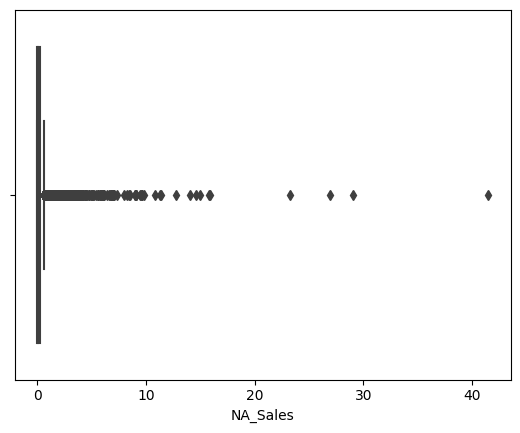

In [ ]:
#detect outlier
sns.boxplot(df,x= "NA_Sales")

In [ ]:
df[df['NA_Sales']>20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


<Axes: xlabel='EU_Sales'>

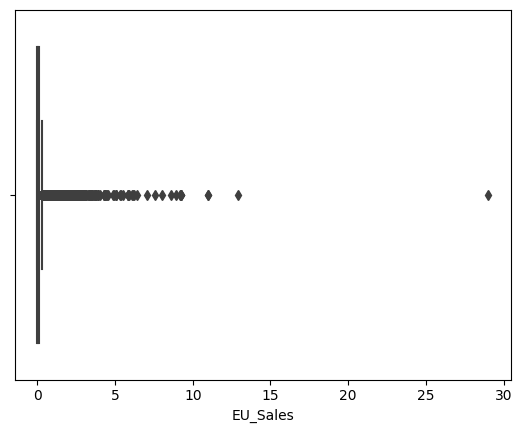

In [ ]:
sns.boxplot(df,x= "EU_Sales")

In [ ]:
df[df['EU_Sales']>20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


<Axes: xlabel='JP_Sales'>

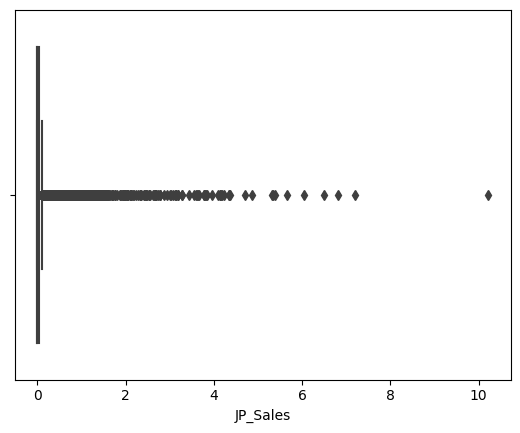

In [ ]:
sns.boxplot(df,x= "JP_Sales")

In [ ]:
df[df['JP_Sales']>8]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


<Axes: xlabel='Other_Sales'>

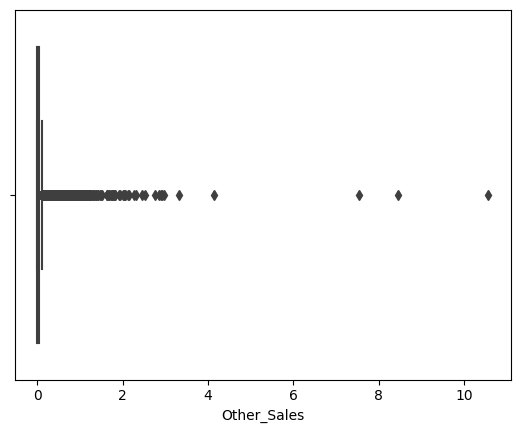

In [ ]:
sns.boxplot(df,x= "Other_Sales")

In [ ]:
df[df['Other_Sales']>6]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66


<Axes: xlabel='Global_Sales'>

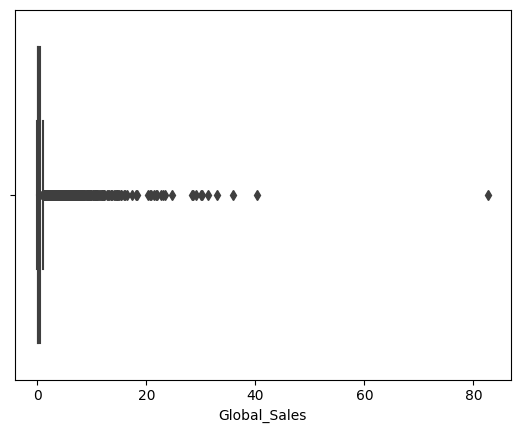

In [ ]:
sns.boxplot(df,x= "Global_Sales")

In [ ]:
df[df['Global_Sales']>80]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
#Nothing strange about the outlier

# Analyze

## Summary

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#time period
print ("Start: "+ str(df.Year.min()))
print ("End: "+ str(df.Year.max()))
print ("Period: " +str(df.Year.max() - df.Year.min()))

Start: 1980
End: 2020
Period: 40


In [ ]:
print("Total number of games" + "\n" + str(df["Name"].nunique()))

Total number of games
11325


In [ ]:
print("Total number of platforms" + "\n" + str(df["Platform"].nunique()))

Total number of platforms
31


In [ ]:
print("Total number of publishers" + "\n" + str(df["Publisher"].nunique()))

Total number of publishers
576


In [ ]:
#Total Revenue
df['Global_Sales'].sum()

8811.97

In [ ]:
df['NA_Sales'].sum()

4327.650000000001

In [ ]:
df['EU_Sales'].sum()

2406.69

In [ ]:
df['JP_Sales'].sum()

1284.2700000000002

In [ ]:
df['Other_Sales'].sum()

788.9100000000001

In [ ]:
#Top 5 Genre of all-time
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending= False).head(5)

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Name: Global_Sales, dtype: float64

In [ ]:
#Top 5 Platform of all-time
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending= False).head(5)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
Name: Global_Sales, dtype: float64

## Sales by Year

In [ ]:
Year_Sales= df.groupby('Year')["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"].sum().reset_index()

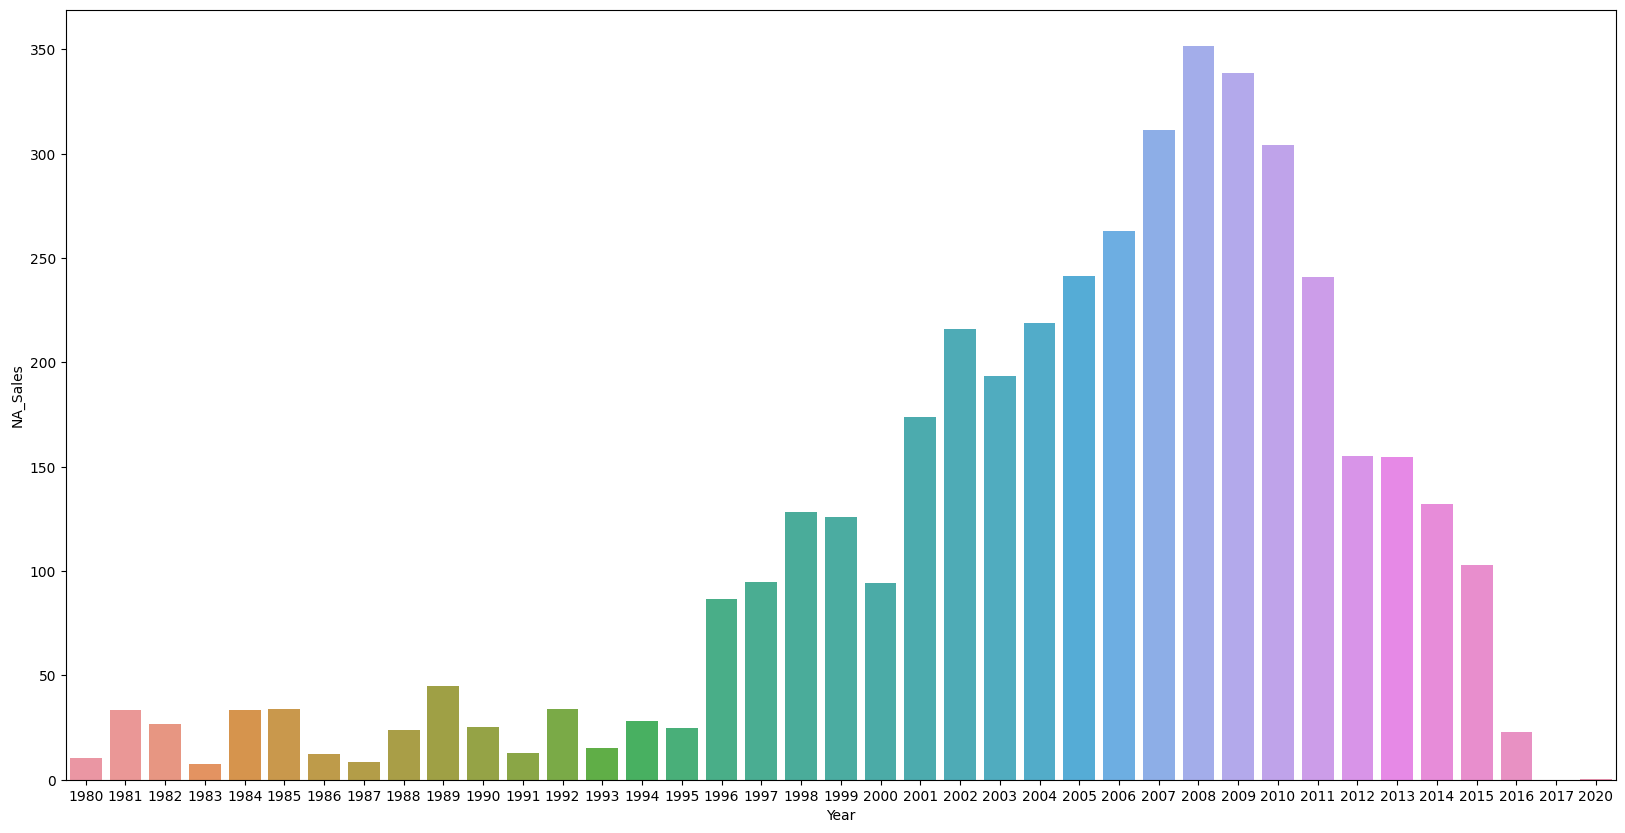

In [ ]:
#NA Sales -  Year
plt.figure(figsize=(20, 10))
sns.barplot(data=Year_Sales, x="Year", y="NA_Sales")
plt.show()


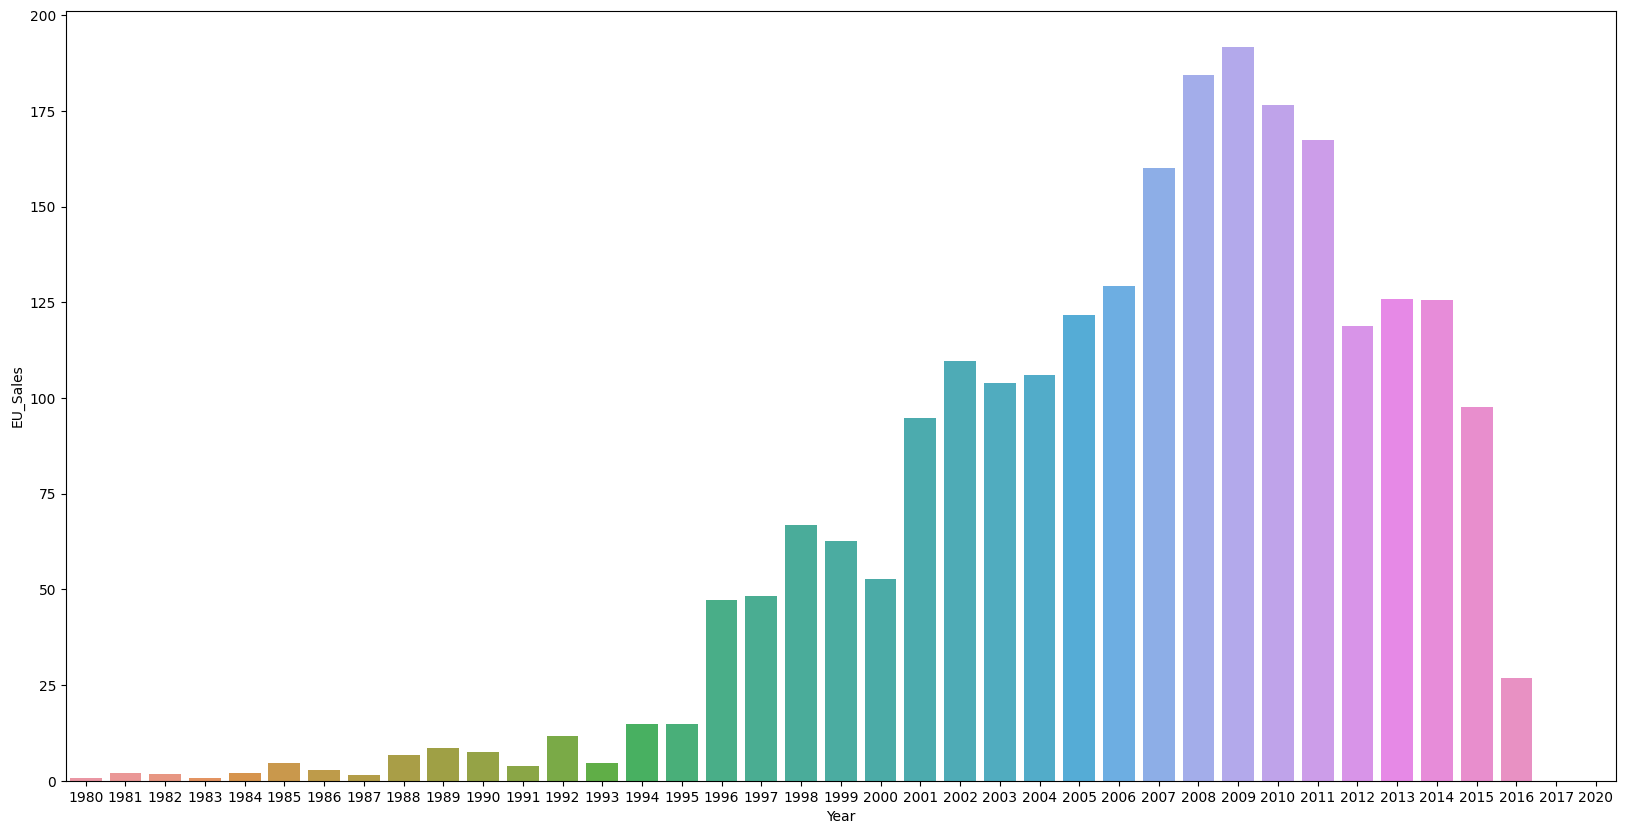

In [ ]:
#EU Sales -  Year
plt.figure(figsize=(20, 10))
sns.barplot(data=Year_Sales, x="Year", y="EU_Sales")
plt.show()


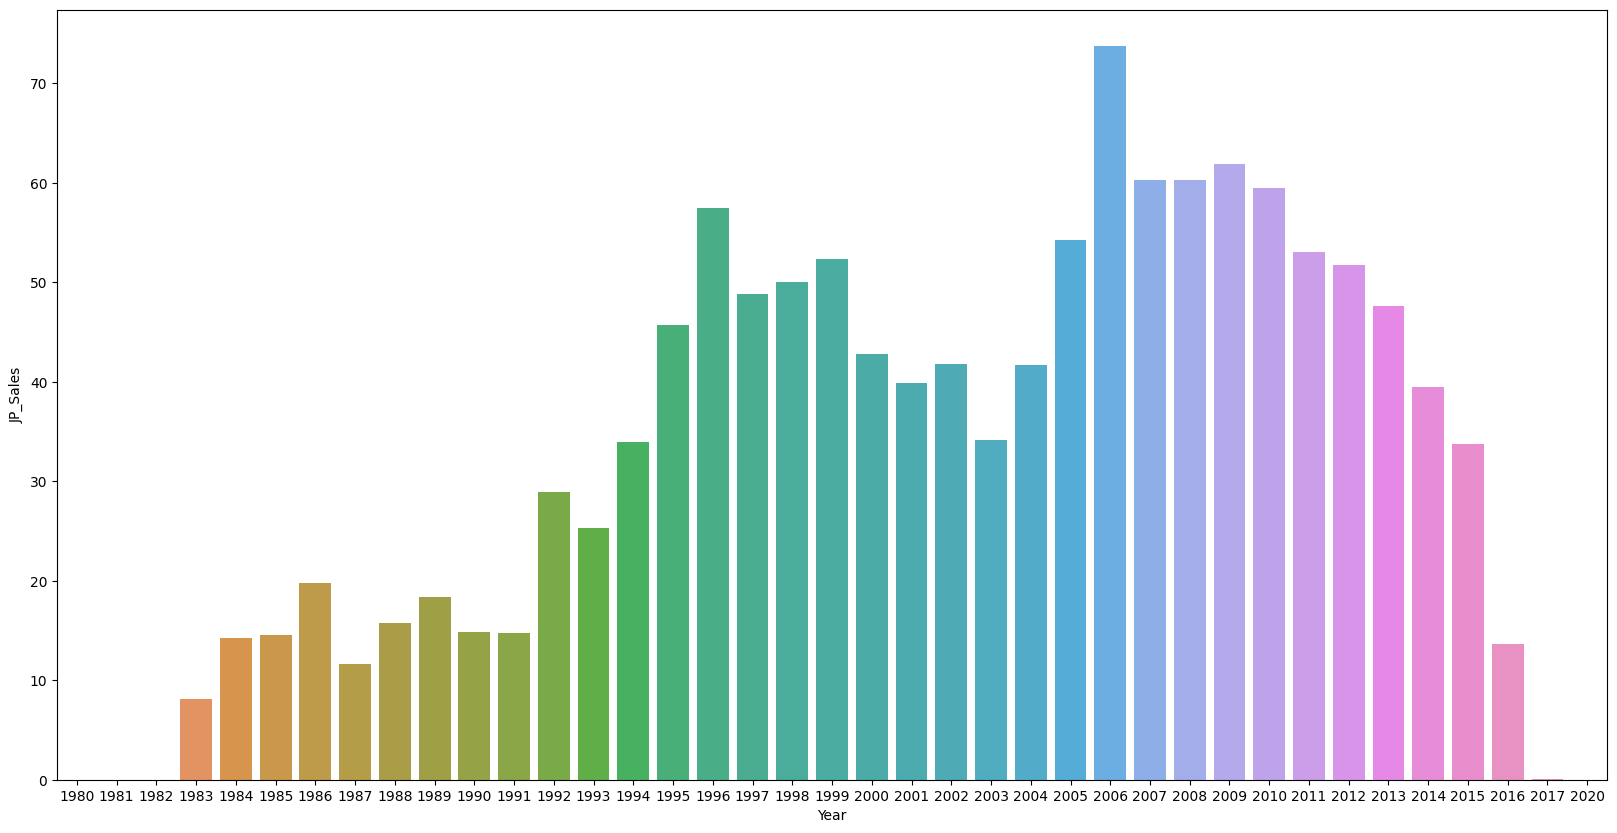

In [ ]:
#JP Sales -  Year
plt.figure(figsize=(20, 10))
sns.barplot(data=Year_Sales, x="Year", y="JP_Sales")
plt.show()


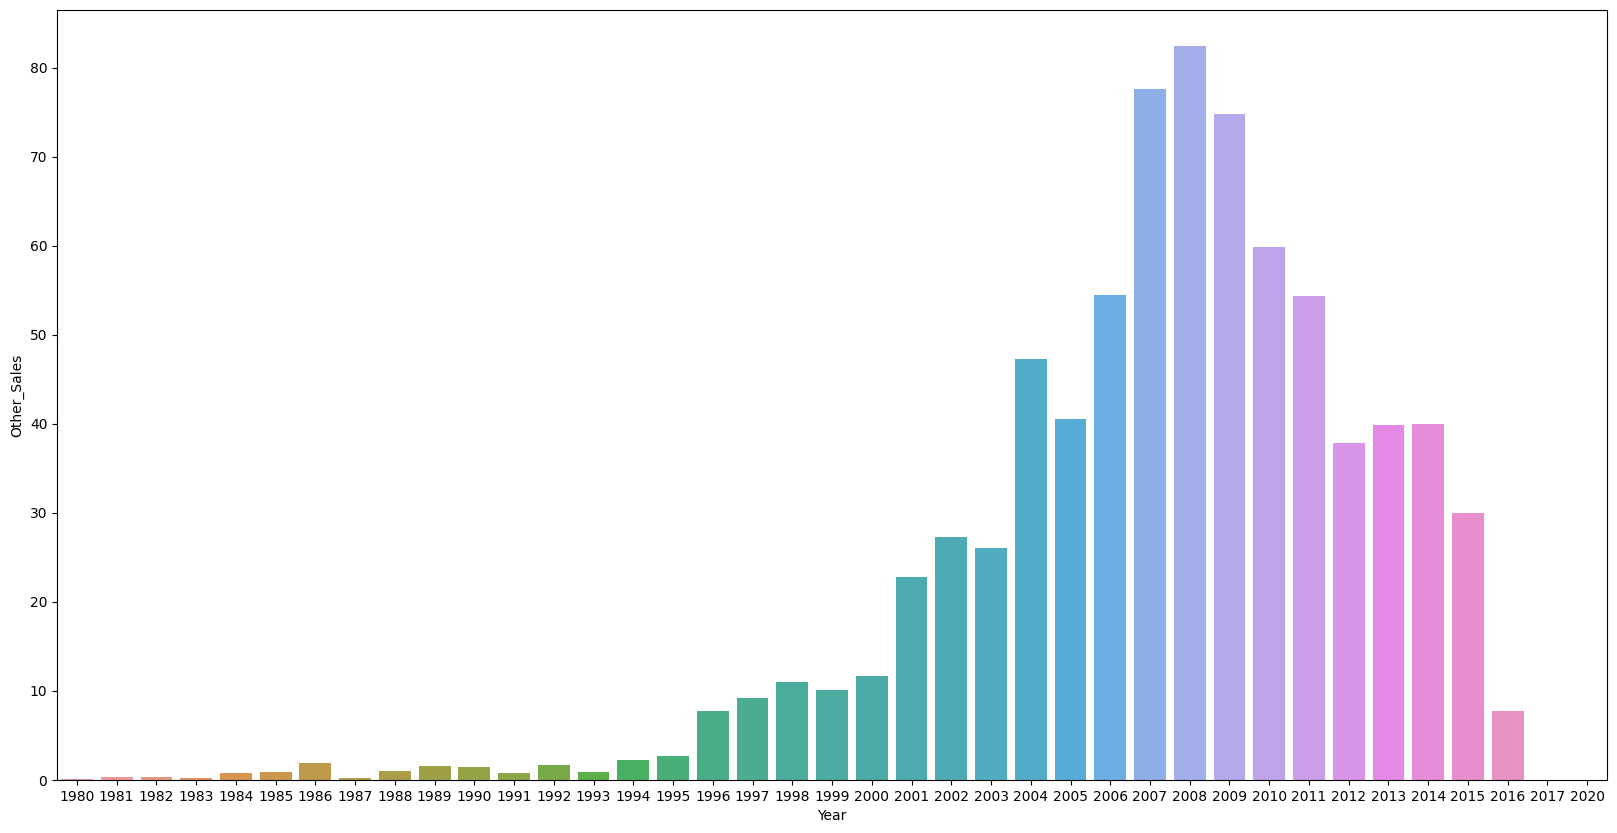

In [ ]:
#Other Sales -  Year
plt.figure(figsize=(20, 10))
sns.barplot(data=Year_Sales, x="Year", y="Other_Sales")
plt.show()

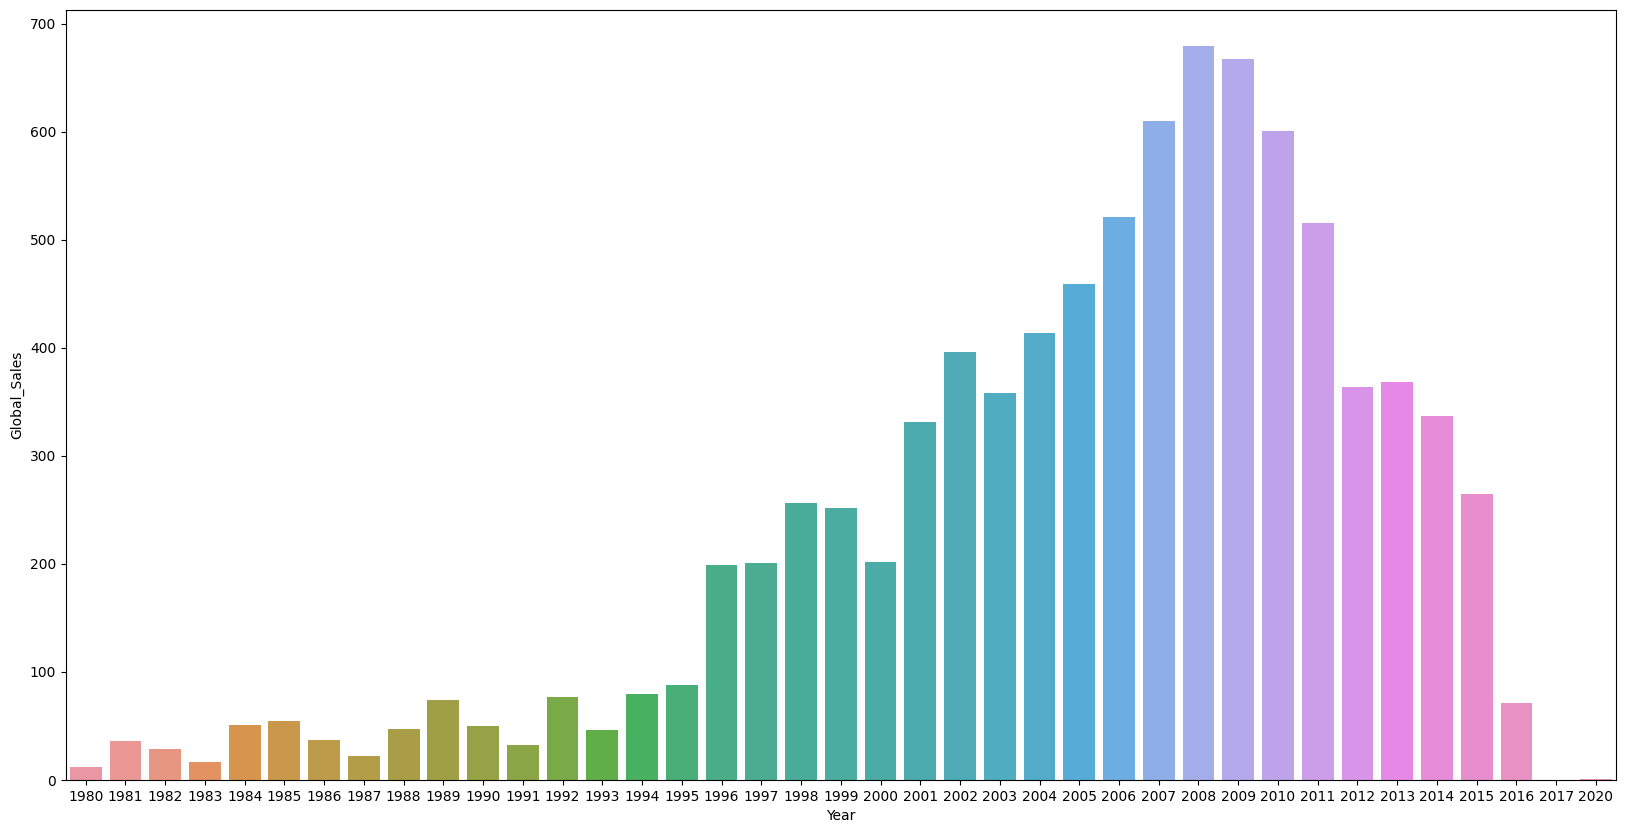

In [ ]:
#Global Sales -  Year
plt.figure(figsize=(20, 10))
sns.barplot(data=Year_Sales, x="Year", y="Global_Sales")
plt.show()


In [ ]:
#JP: 3 Exploding period: 83-91
#92-03
#04-16
#Other market: 96-16

In [ ]:
#JP market
JP = df[['Name','Platform','Year','Genre','Publisher','JP_Sales','Global_Sales']]

In [ ]:
JP1 = JP[JP['Year'].between(1983,1991,inclusive="both")]
JP2 = JP[JP['Year'].between(1992,2003,inclusive="both")]
JP3 = JP[JP['Year'].between(2004,2016,inclusive="both")]

In [ ]:
#Other market
Other = df.drop(columns=['Rank','JP_Sales'])
Other = Other[Other['Year'].between(1996,2016,inclusive="both")]

## JP market

### 83-91

In [ ]:
#Top 5 Publishers
JP1.groupby('Publisher')['JP_Sales','Global_Sales'].sum().sort_values('JP_Sales',ascending=False).head(5)


,JP_Sales,Global_Sales
Publisher,,
Nintendo,80.88,286.38
Namco Bandai Games,14.60,18.03
Enix Corporation,9.21,9.55
Hudson Soft,6.37,7.23
Konami Digital Entertainment,5.96,11.56


In [ ]:
#Total Sales
JP1['JP_Sales'].sum()

132.15

In [ ]:
#Total Platform
JP1['Platform'].nunique()

7

In [ ]:
#Total game published
JP1['Name'].nunique()

161

In [ ]:
#Number of Publisher
JP1['Publisher'].nunique()

25

In [ ]:
#Number of Genre
JP1['Genre'].nunique()

12

<Axes: ylabel='JP_Sales'>

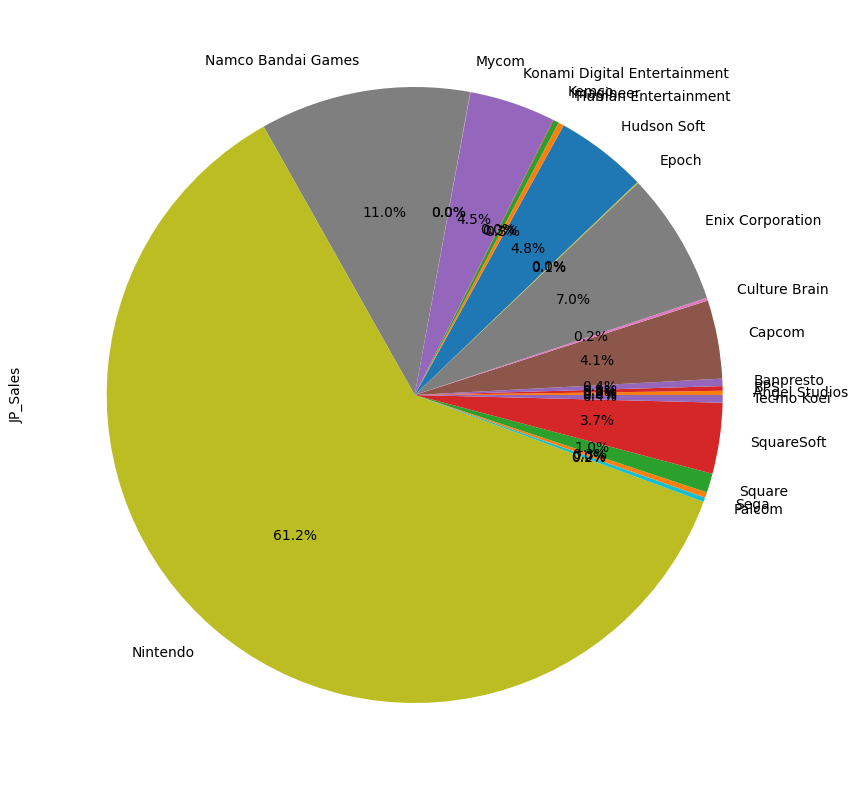

In [ ]:
#Publisher Sales Distribution
JP1.groupby('Publisher')['JP_Sales'].sum().plot.pie(y='JP_Sales', figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Nintendo dominated the market with 61.2% sales

<Axes: ylabel='JP_Sales'>

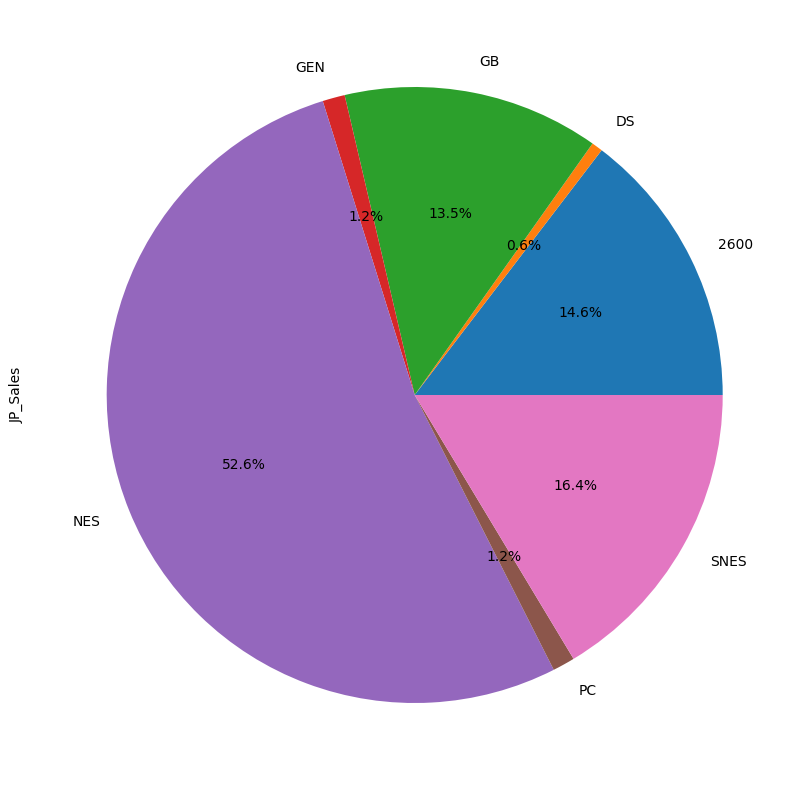

In [ ]:
#Platform Distribution by Number of games
JP1.groupby('Platform')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
# With NES, GB, SNES, Nintendo had 82.5% games on their platform

<Axes: ylabel='JP_Sales'>

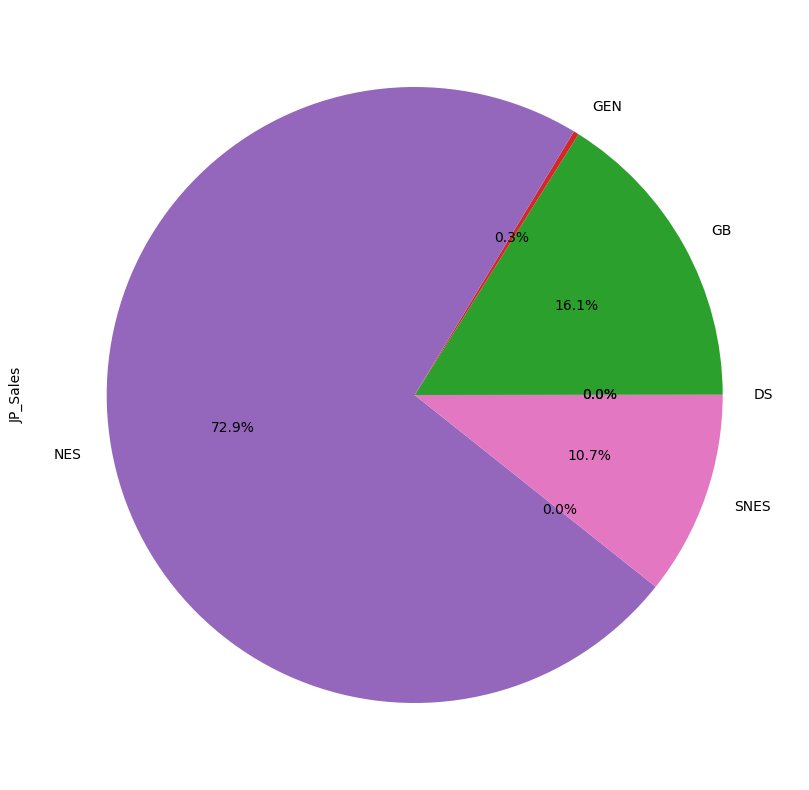

In [ ]:
#Platform Distribution by Sales
JP1.groupby('Platform')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#99.7% sales on Nintendo's Platform

<Axes: ylabel='JP_Sales'>

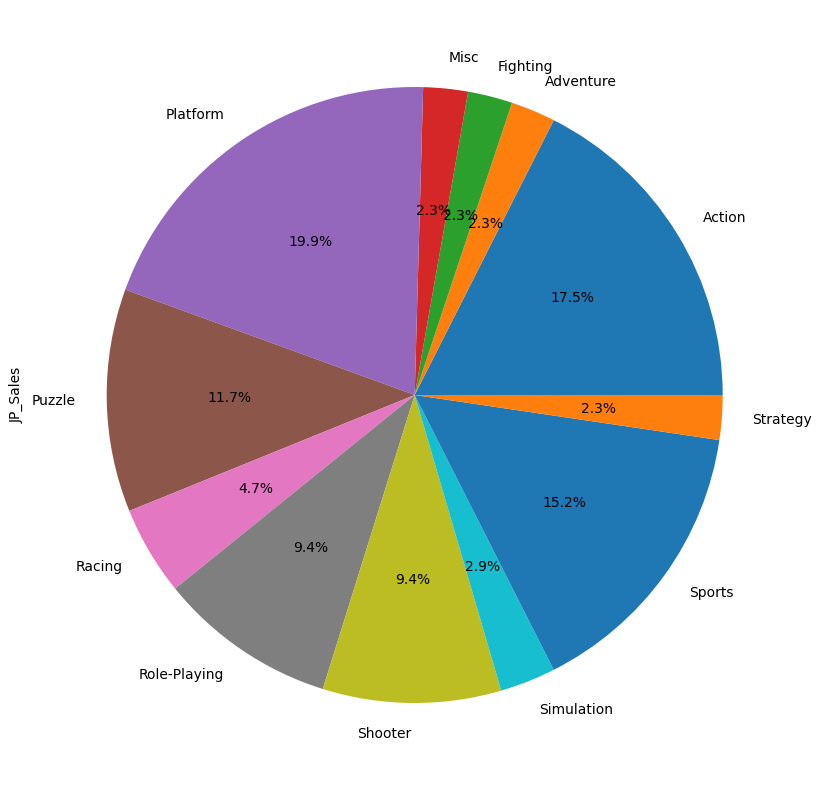

In [ ]:
# Genre Distribution By Number of games
# Wide variety of genres
JP1.groupby('Genre')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

<Axes: ylabel='JP_Sales'>

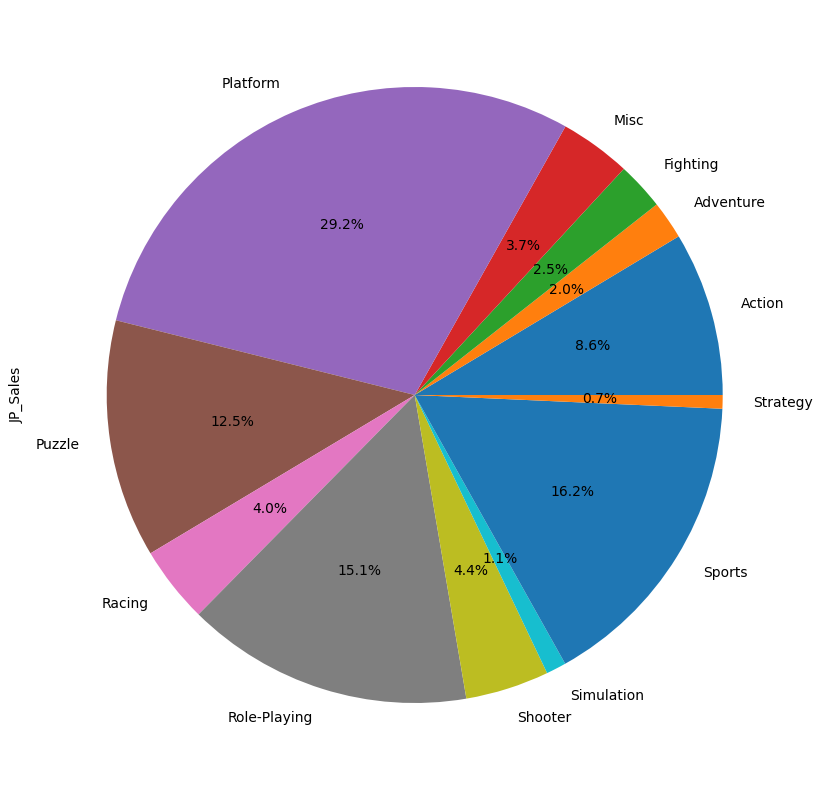

In [ ]:
# Genre Distribution By Sales
JP1.groupby('Genre')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Platform ,Puzzle, Role playing, Sport, Action: Top seling Genres

### 92-03

In [ ]:
#Top 5 Publishers
JP2.groupby('Publisher')['JP_Sales','Global_Sales'].sum().sort_values('JP_Sales',ascending=False).head(5)

,JP_Sales,Global_Sales
Publisher,,
Nintendo,132.10,478.97
Sony Computer Entertainment,55.66,286.88
Konami Digital Entertainment,41.13,101.10
Namco Bandai Games,37.66,72.31
SquareSoft,35.22,52.41


In [ ]:
#Total Sales
JP2['JP_Sales'].sum()

501.25999999999993

In [ ]:
#Total game published
JP2['Name'].nunique()

3374

In [ ]:
#Total Platform
JP2['Platform'].nunique()

20

In [ ]:
#Number of Publisher
JP2['Publisher'].nunique()

263

<Axes: ylabel='JP_Sales'>

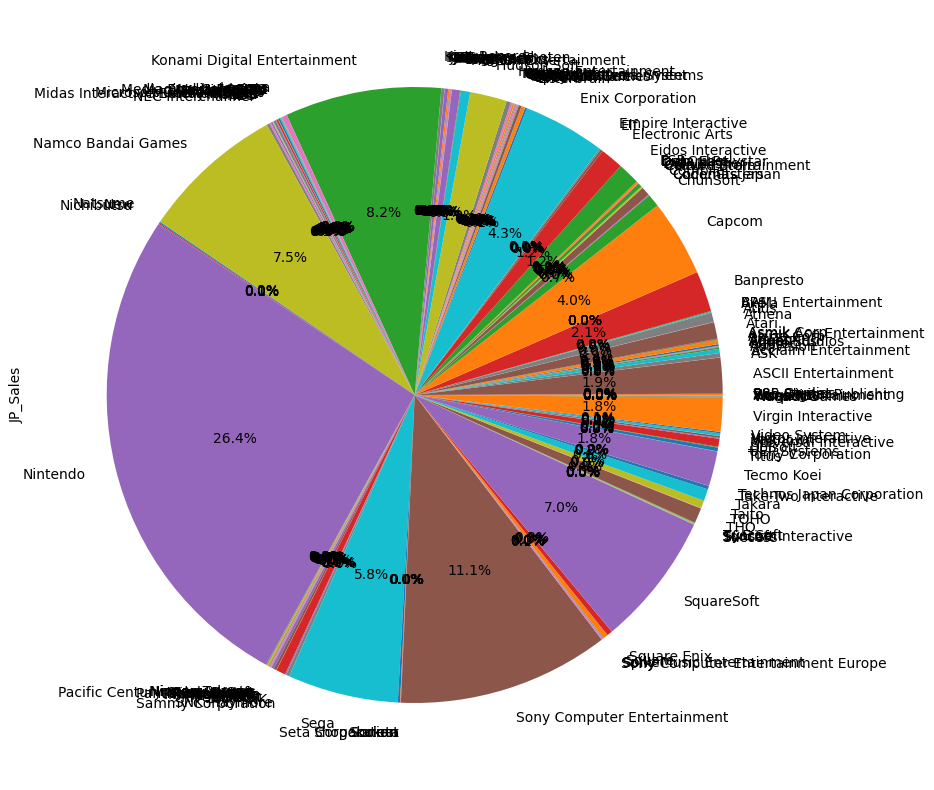

In [ ]:
#Publisher Sales Distribution
JP2.groupby('Publisher')['JP_Sales'].sum().plot.pie(y='JP_Sales', figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Competitive market
# Outstanding publisher: Nintendo, Bandai , Konami, Enix, Capcom, Squaresoft, Sony, Sega

<Axes: ylabel='JP_Sales'>

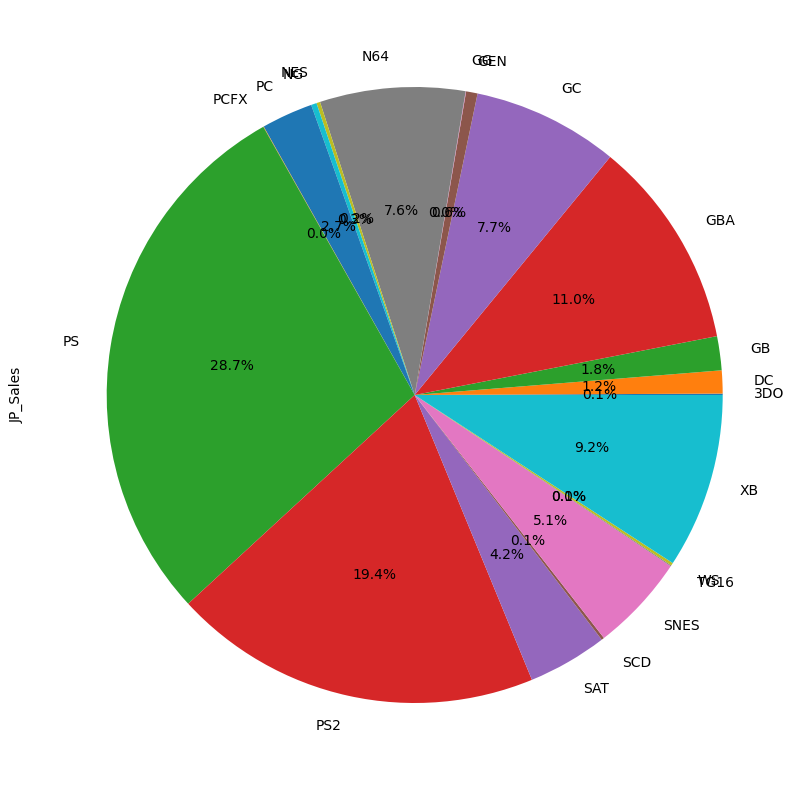

In [ ]:
#Platform Distribution by Number of games
JP2.groupby('Platform')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#48.1% games on Sony's Platform: PS and PS2

<Axes: ylabel='JP_Sales'>

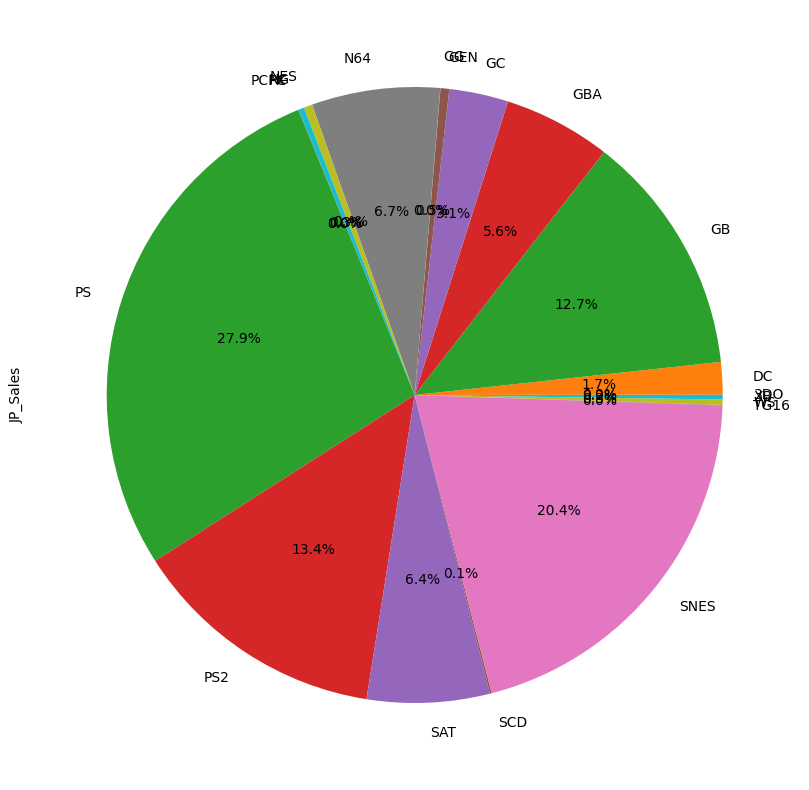

In [ ]:
#Platform Distribution by Sales
JP2.groupby('Platform')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
# Publisher on SNES platform with 5.1% total games gained 20.4% total sales

In [ ]:
SNES = JP2[JP2['Platform']=="SNES"]

<Axes: ylabel='JP_Sales'>

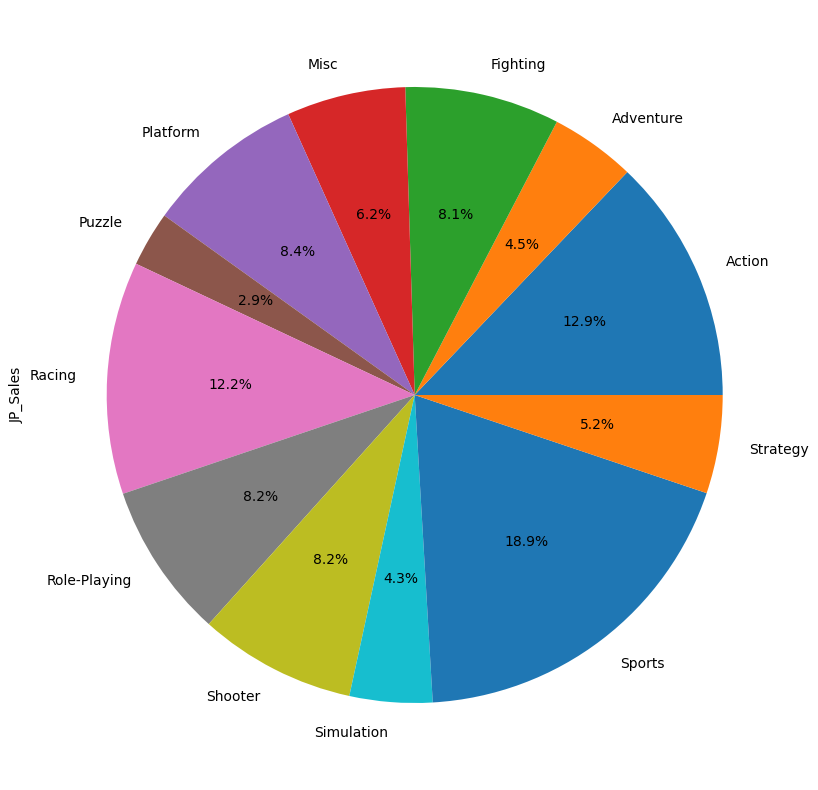

In [ ]:
# Genres Distribution by Number of Games
JP2.groupby('Genre')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

<Axes: ylabel='JP_Sales'>

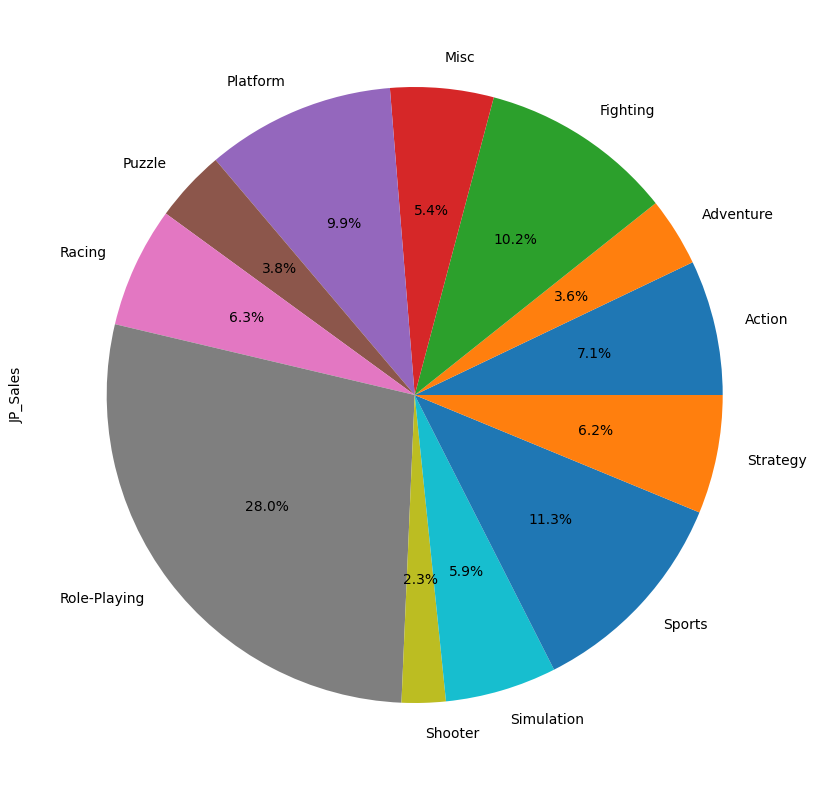

In [ ]:
# Genres Distribution by Sales
JP2.groupby('Genre')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Role playing: outstanding Genre

<Axes: ylabel='JP_Sales'>

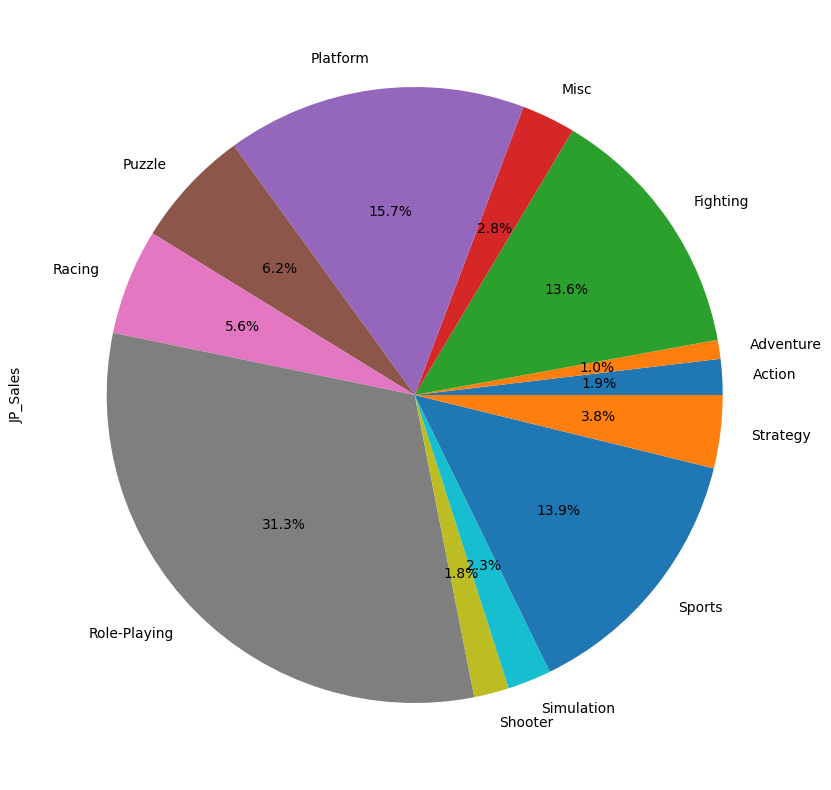

In [ ]:
# SNES Genres Distribution by Sales
SNES.groupby('Genre')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Publishers on SNES's following trend strategy gain them massive sales with Role playing, Platform, Fighting, Sports Genre

<Axes: ylabel='JP_Sales'>

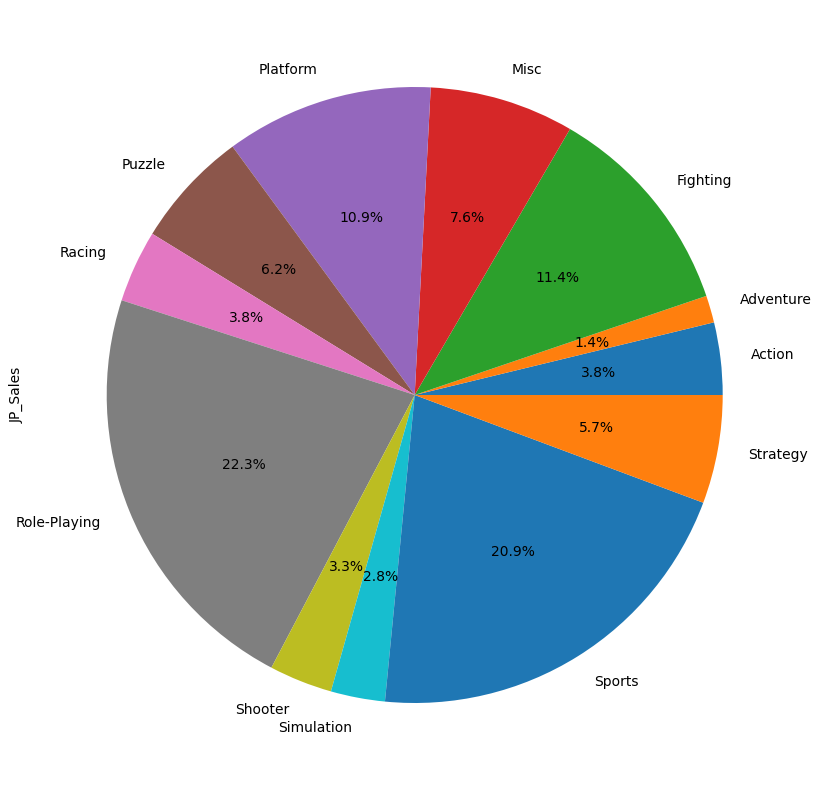

In [ ]:
# SNES Genres Distribution by Number of games
SNES.groupby('Genre')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

### 04-16

In [ ]:
#Top 5 Publishers
JP3.groupby('Publisher')['JP_Sales','Global_Sales'].sum().sort_values('JP_Sales',ascending=False).head(5)

,JP_Sales,Global_Sales
Publisher,,
Nintendo,242.01,1019.08
Namco Bandai Games,74.58,163.31
Square Enix,48.36,142.31
Konami Digital Entertainment,43.84,165.90
Capcom,41.79,126.48


In [ ]:
#Total Sales
JP3['JP_Sales'].sum()

650.8100000000001

In [ ]:
#Total game published
JP3['Name'].nunique()

7824

In [ ]:
#Total Platform
JP3['Platform'].nunique()

16

In [ ]:
#Number of Publisher
JP3['Publisher'].nunique()

402

<Axes: ylabel='JP_Sales'>

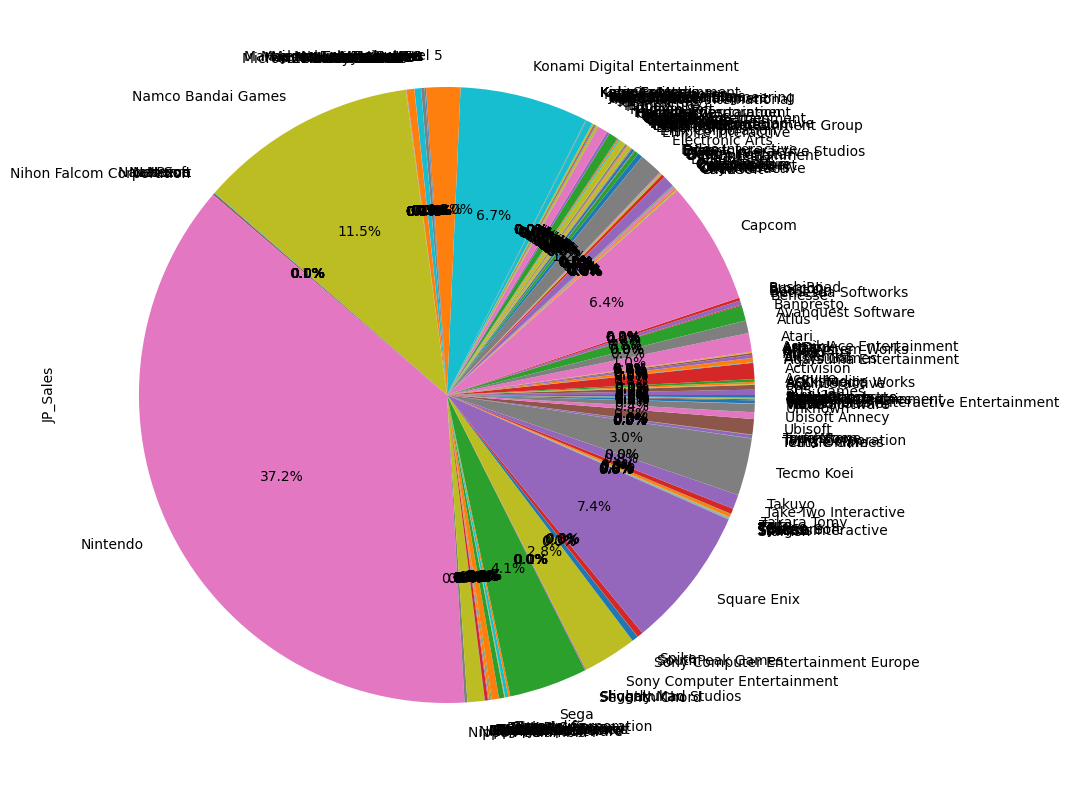

In [ ]:
#Publisher Sales Distribution
JP3.groupby('Publisher')['JP_Sales'].sum().plot.pie(y='JP_Sales', figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Competitive market
# Outstanding publisher: Nintendo, Bandai , Konami, Enix, Capcom, Sega, Koei Tecmo

<Axes: ylabel='JP_Sales'>

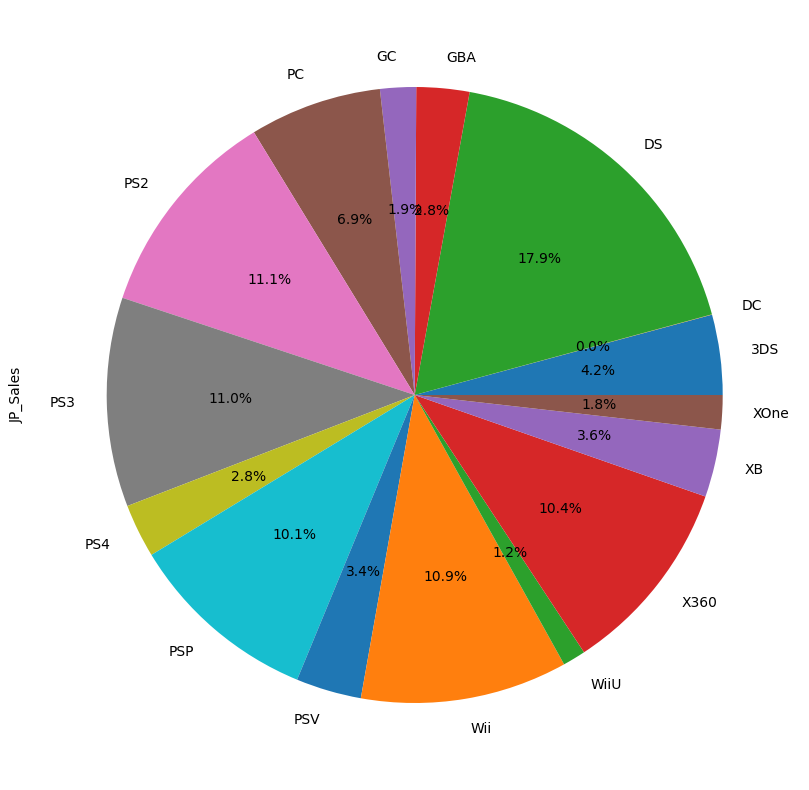

In [ ]:
#Platform Distribution by Number of games
JP3.groupby('Platform')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Multuple platform from Sony : PS2, PS3, Ps4, PSP, PSV

<Axes: ylabel='JP_Sales'>

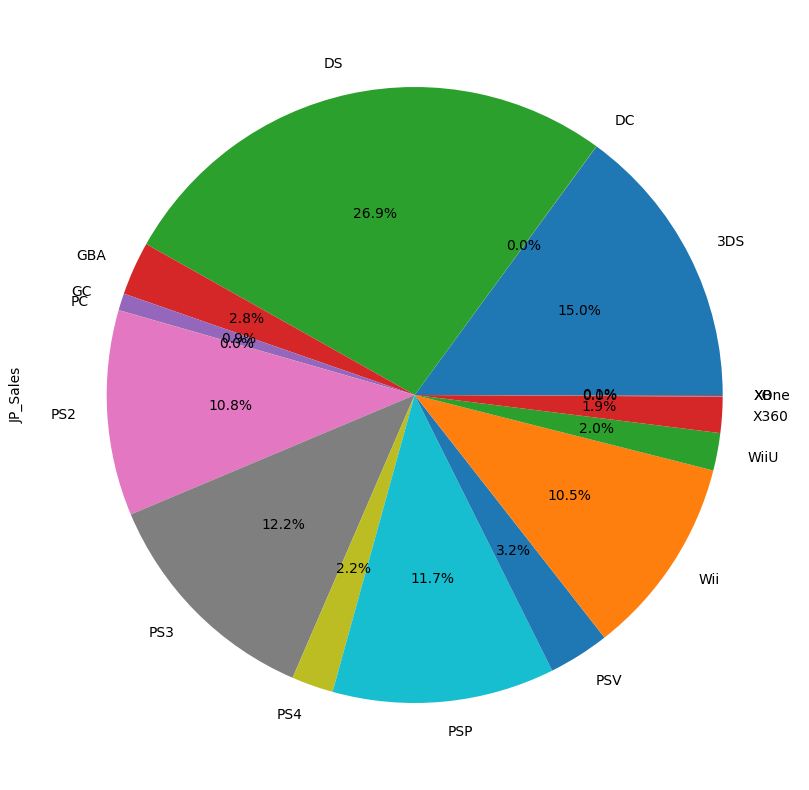

In [ ]:
#Platform Distribution by Sales
JP3.groupby('Platform')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
# Publisher on DS platform 26.9% total sales

In [ ]:
DS = JP3[JP3['Platform']=="DS"]

<Axes: ylabel='JP_Sales'>

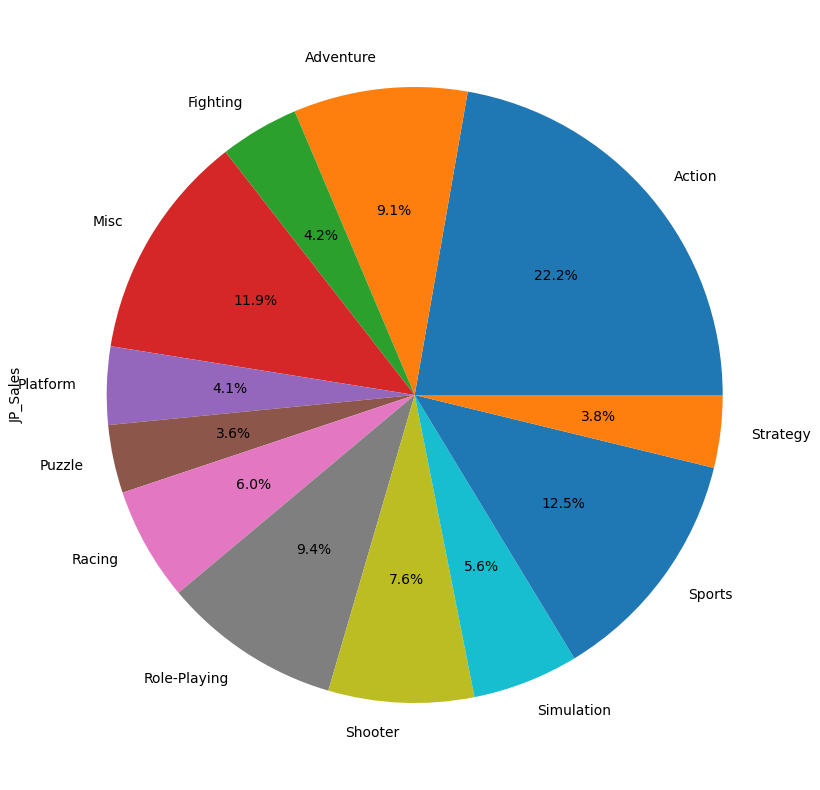

In [ ]:
# Genres Distribution by Number of Games
JP3.groupby('Genre')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

<Axes: ylabel='JP_Sales'>

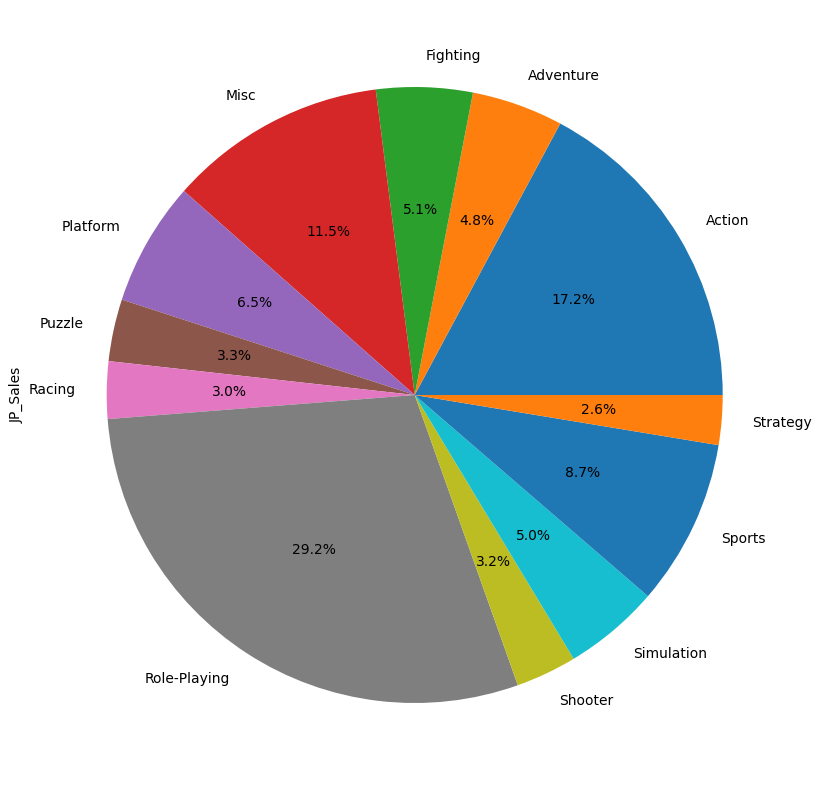

In [ ]:
# Genres Distribution by Sales
JP3.groupby('Genre')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Role playing, Action, Misc: outstanding Genre

<Axes: ylabel='JP_Sales'>

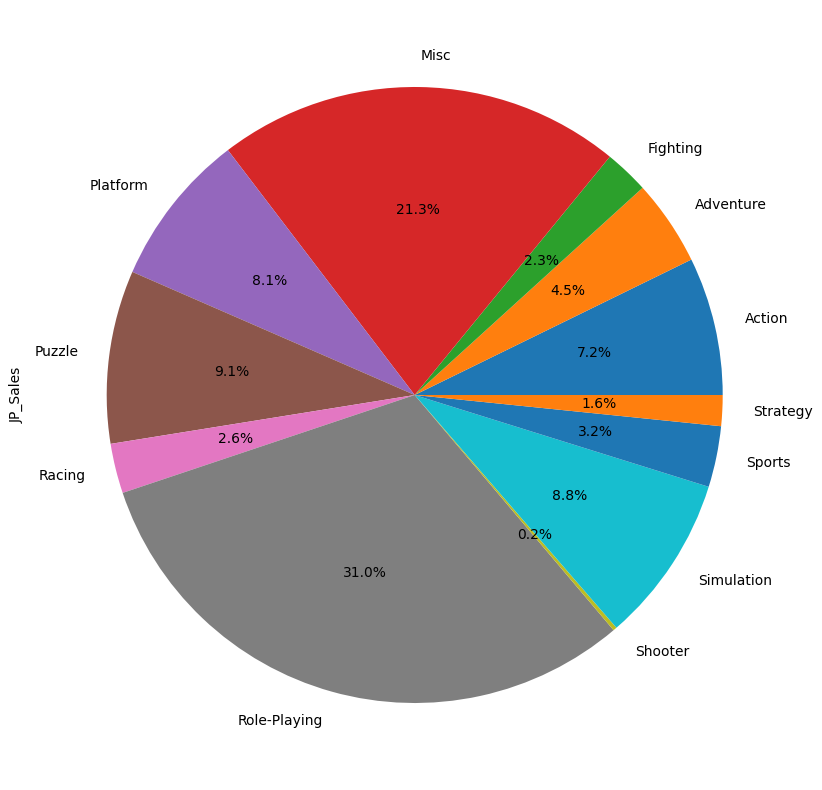

In [ ]:
# DS Genres Distribution by Sales
DS.groupby('Genre')['JP_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Publishers on DS's following trend strategy gain them massive sales with Role playing, Misc

<Axes: ylabel='JP_Sales'>

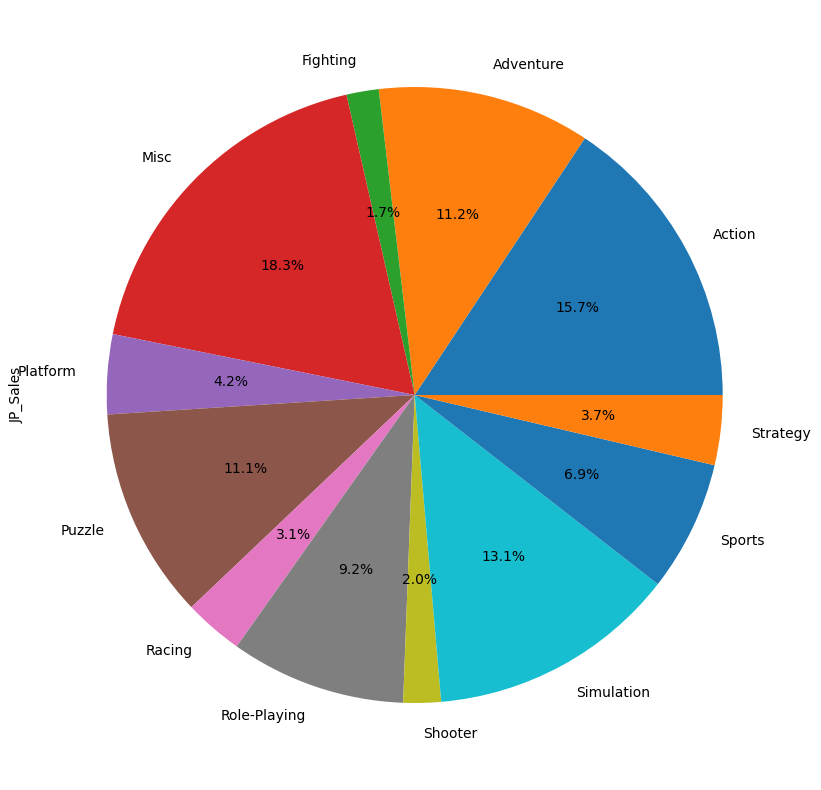

In [ ]:
# DS Genres Distribution by Number of games
DS.groupby('Genre')['JP_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

## Other Market

In [ ]:
Other['Total_Other_Sales'] = Other['NA_Sales']+ Other['EU_Sales']+ Other['Other_Sales']

In [ ]:
#Top 5 Publishers
Other.groupby('Publisher')['NA_Sales','EU_Sales','Other_Sales','Global_Sales','Total_Other_Sales'].sum().sort_values('Global_Sales',ascending=False).head(5)


,NA_Sales,EU_Sales,Other_Sales,Global_Sales,Total_Other_Sales
Publisher,,,,,
Nintendo,603.11,370.23,86.67,1398.19,1060.01
Electronic Arts,582.11,365.90,127.37,1089.35,1075.38
Activision,406.23,209.32,74.25,696.71,689.80
Sony Computer Entertainment,257.16,182.41,79.30,585.40,518.87
Ubisoft,251.00,161.70,49.98,470.22,462.68


In [ ]:
#Total Sales
Other['Total_Other_Sales'].sum()

7041.550000000001

In [ ]:
#Total game published
Other['Name'].nunique()

10720

In [ ]:
#Total Platform
Other['Platform'].nunique()

24

In [ ]:
#Number of Publisher
Other['Publisher'].nunique()

527

<Axes: ylabel='Total_Other_Sales'>

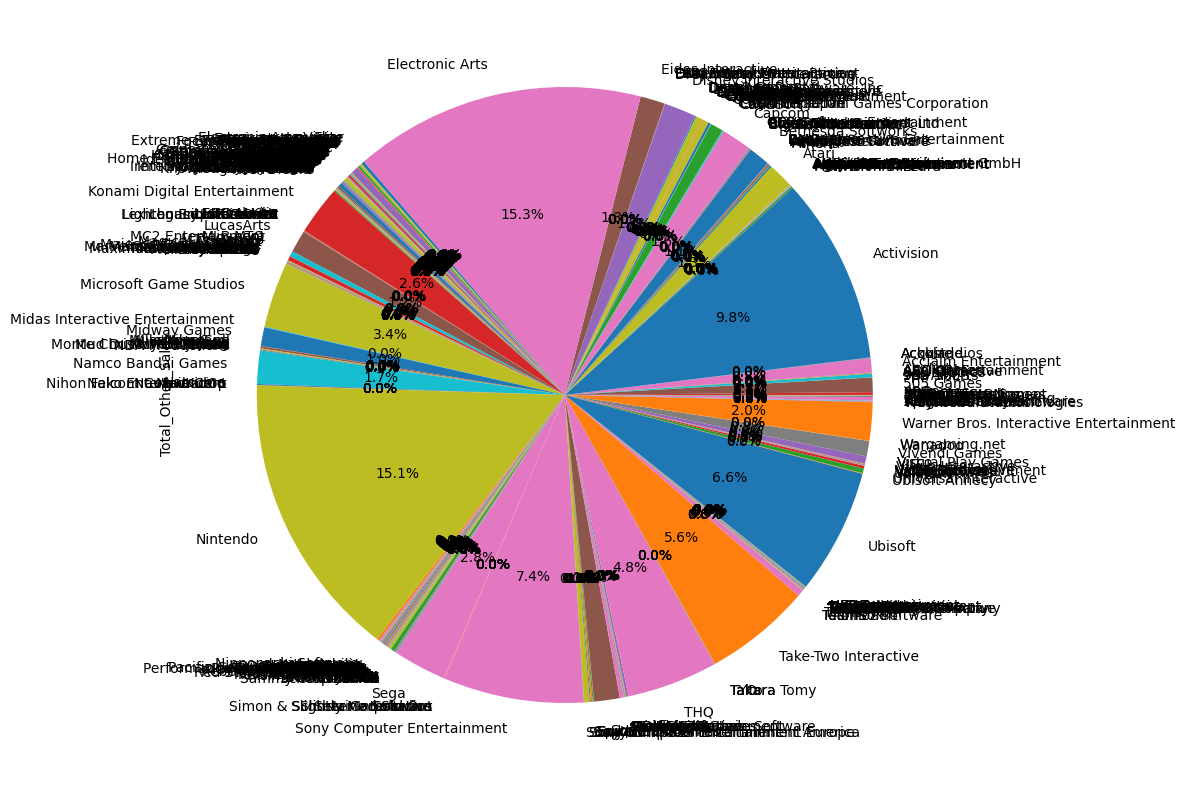

In [ ]:
#Publisher Sales Distribution
Other.groupby('Publisher')['Total_Other_Sales'].sum().plot.pie(y='Total_Other_Sales', figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Competitive market
# EA vs Nintendo
#SOny, Ubisoft, Activision, Take2, THQ

<Axes: ylabel='Total_Other_Sales'>

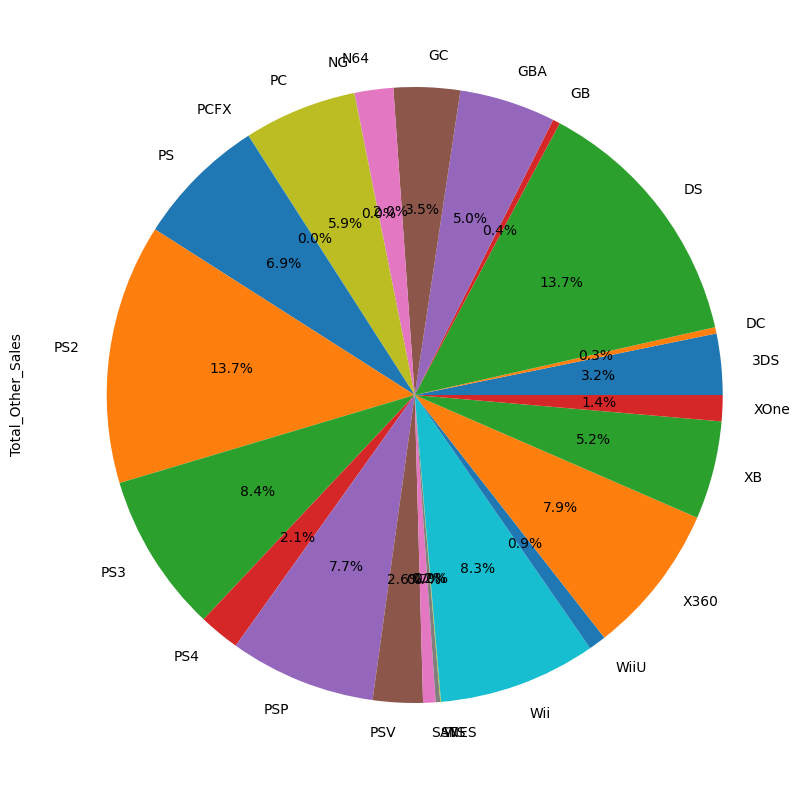

In [ ]:
#Platform Distribution by Number of games
Other.groupby('Platform')['Total_Other_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

<Axes: ylabel='Total_Other_Sales'>

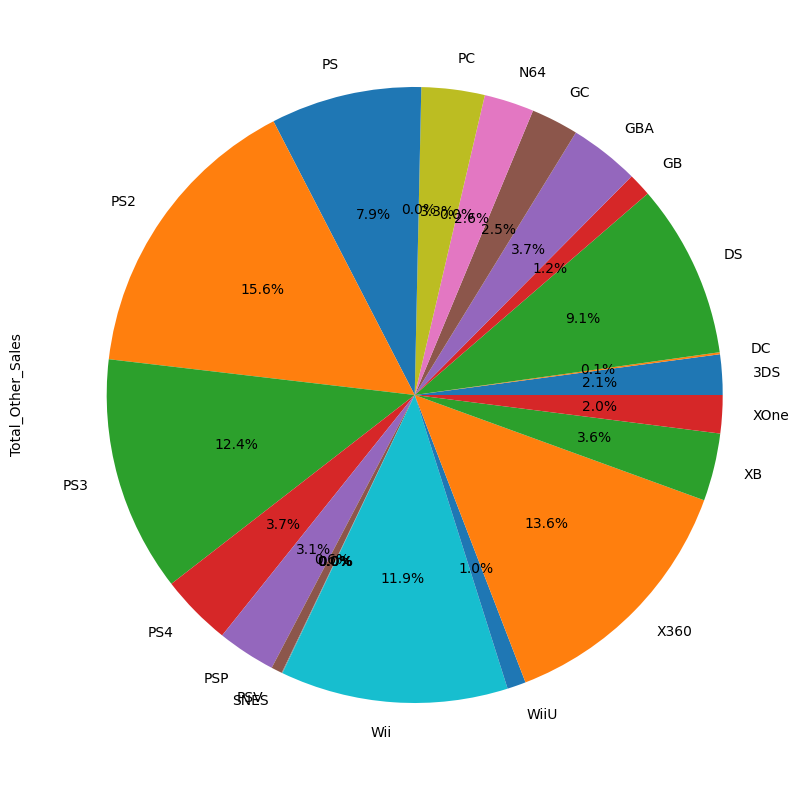

In [ ]:
#Platform Distribution by Sales
Other.groupby('Platform')['Total_Other_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')


<Axes: ylabel='Total_Other_Sales'>

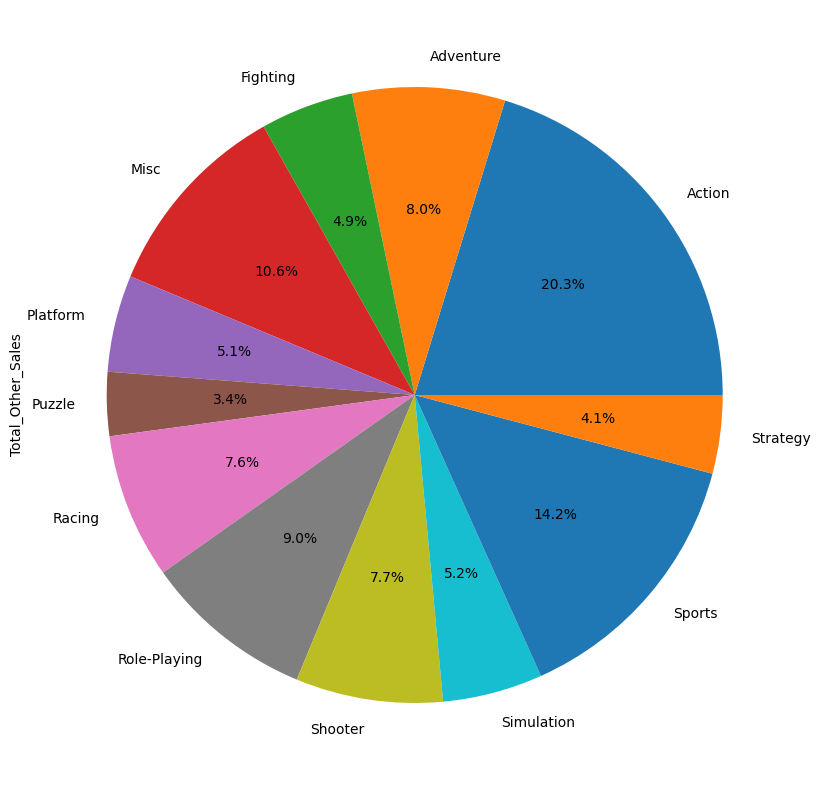

In [ ]:
# Genre Distribution By Number of games
Other.groupby('Genre')['Total_Other_Sales'].count().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

<Axes: ylabel='Total_Other_Sales'>

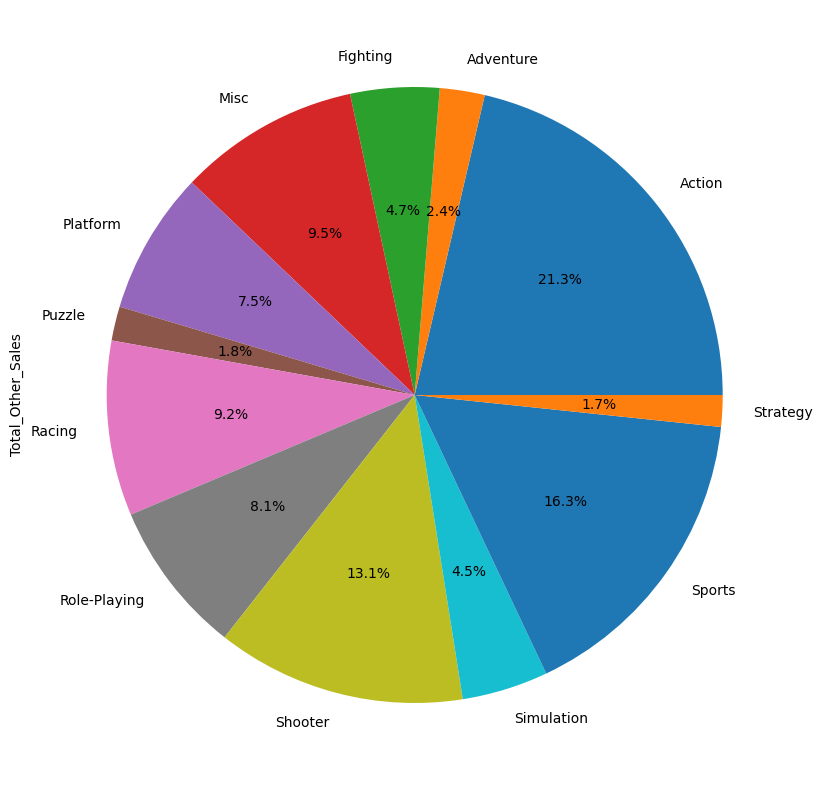

In [ ]:
# Genre Distribution By Sales
Other.groupby('Genre')['Total_Other_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')
#Action & Sport

In [ ]:
Nin = Other[Other['Publisher']=="Nintendo"]
EA = Other[Other['Publisher']=="Electronic Arts"]

<Axes: ylabel='Total_Other_Sales'>

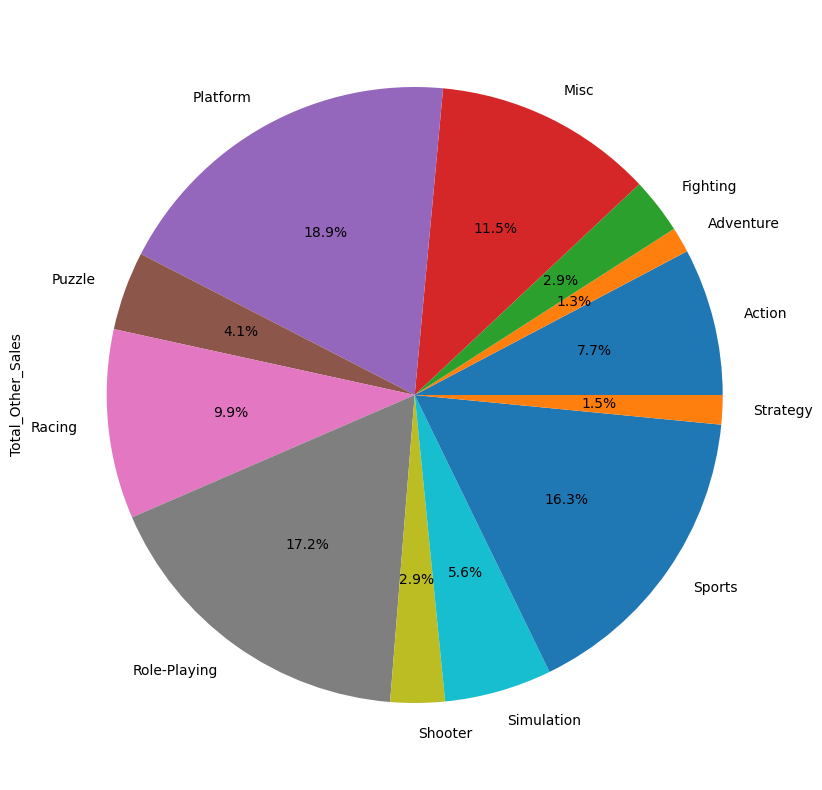

In [ ]:
# Nintendo Genre Distribution By Sales
Nin.groupby('Genre')['Total_Other_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')

<Axes: ylabel='Total_Other_Sales'>

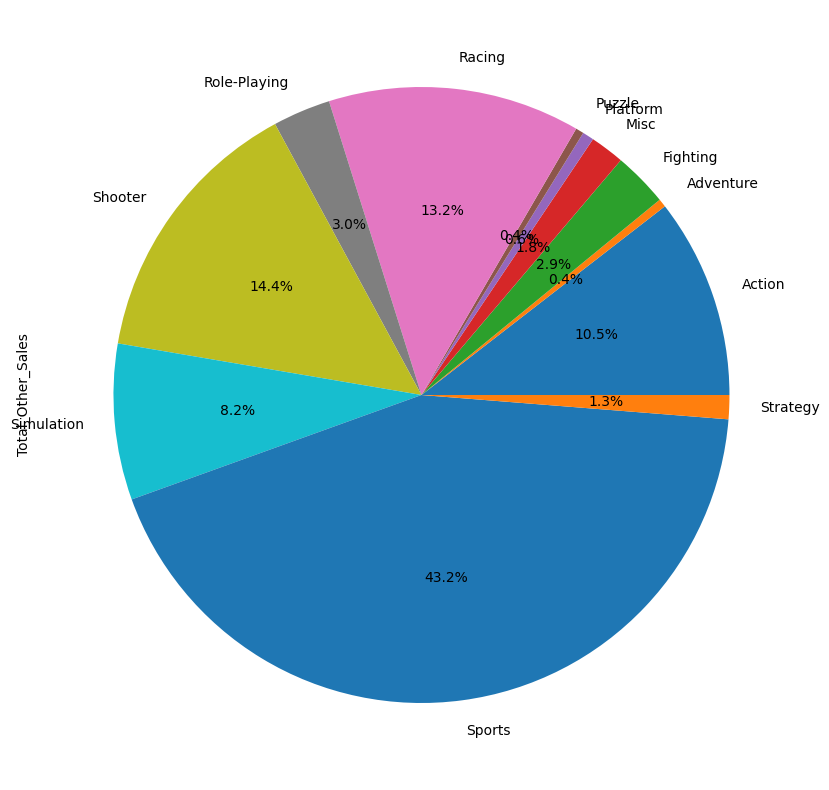

In [ ]:
# EA Genre Distribution By Sales
EA.groupby('Genre')['Total_Other_Sales'].sum().plot.pie(figsize=(20, 10),legend=False,autopct='%1.1f%%')